In [1]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [2]:
# Carregar a base de dados

path = kagglehub.dataset_download("ankushpanday1/usa-statewise-daily-temperature-december-2024")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 5.95k/5.95k [00:00<00:00, 9.81MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday1/usa-statewise-daily-temperature-december-2024/versions/1


['december_temperature_usa_2024_pivoted.csv']

In [3]:
path = '/root/.cache/kagglehub/datasets/ankushpanday1/usa-statewise-daily-temperature-december-2024/versions/1'
df = pd.read_csv(path + '/december_temperature_usa_2024_pivoted.csv')

## Propriedades dos dados:

In [4]:
# Verificando as linhas iniciais do dataset
df.head()

State  Average_Temperature_Min_F_2024-12-01  \
0     Alabama                                  35.2   
1      Alaska                                  10.9   
2     Arizona                                  42.5   
3    Arkansas                                  30.2   
4  California                                  44.7   

   Average_Temperature_Min_F_2024-12-02  Average_Temperature_Min_F_2024-12-03  \
0                                  34.0                                  33.6   
1                                  11.8                                   8.4   
2                                  43.2                                  45.7   
3                                  32.1                                  30.3   
4                                  47.8                                  45.3   

   Average_Temperature_Min_F_2024-12-04  Average_Temperature_Min_F_2024-12-05  \
0                                  34.9                                  33.8   
1                                   7.0                                   9.7   
2                                  44.2                                  44.9   
3                                  30.8                                  29.3   
4                                  42.6                                  46.8   

   Average_Temperature_Min_F_2024-12-06  Average_Temperature_Min_F_2024-12-07  \
0                                  36.4                                  37.6   
1                                  10.2                                   8.7   
2                                  42.7                                  45.9   
3                                  32.3                                  33.1   
4                                  47.2                                  45.6   

   Average_Temperature_Min_F_2024-12-08  Average_Temperature_Min_F_2024-12-09  \
0                                  33.3                                  34.1   
1                                   9.7                                   8.8   
2                                  43.9                                  44.6   
3                                  30.9                                  34.3   
4                                  47.0                                  44.5   

   ...  Average_Temperature_Max_F_2024-12-22  \
0  ...                                  52.6   
1  ...                                  21.1   
2  ...                                  67.7   
3  ...                                  53.7   
4  ...                                  65.7   

   Average_Temperature_Max_F_2024-12-23  Average_Temperature_Max_F_2024-12-24  \
0                                  54.7                                  53.4   
1                                  19.5                                  21.8   
2                                  66.5                                  67.0   
3                                  51.8                                  52.6   
4                                  62.4                                  66.7   

   Average_Temperature_Max_F_2024-12-25  Average_Temperature_Max_F_2024-12-26  \
0                                  57.4                                  53.9   
1                                  21.4                                  21.6   
2                                  63.5                                  64.9   
3                                  54.0                                  53.4   
4                                  66.5                                  64.6   

   Average_Temperature_Max_F_2024-12-27  Average_Temperature_Max_F_2024-12-28  \
0                                  54.6                                  56.2   
1                                  19.6                                  20.0   
2                                  63.5                                  66.7   
3                                  53.6                                  49.4   
4                                  62.2                      

In [5]:
# Verificando todas as colunas com os tipos de dados e a quantidade de conteúdos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 50 non-null     object 
 1   Average_Temperature_Min_F_2024-12-01  50 non-null     float64
 2   Average_Temperature_Min_F_2024-12-02  50 non-null     float64
 3   Average_Temperature_Min_F_2024-12-03  50 non-null     float64
 4   Average_Temperature_Min_F_2024-12-04  50 non-null     float64
 5   Average_Temperature_Min_F_2024-12-05  50 non-null     float64
 6   Average_Temperature_Min_F_2024-12-06  50 non-null     float64
 7   Average_Temperature_Min_F_2024-12-07  50 non-null     float64
 8   Average_Temperature_Min_F_2024-12-08  50 non-null     float64
 9   Average_Temperature_Min_F_2024-12-09  50 non-null     float64
 10  Average_Temperature_Min_F_2024-12-10  50 non-null     float64
 11  Average_Temperature_M

In [14]:
#"Definindo" os dias de dezembro
dias_dezembro = [f'{i:02d}' for i in range(1, 32)]

temp_min = [df[f'Average_Temperature_Min_F_2024-12-{i:02d}'].mean() for i in range(1, 32)]
temp_max = [df[f'Average_Temperature_Max_F_2024-12-{i:02d}'].mean() for i in range(1, 32)]

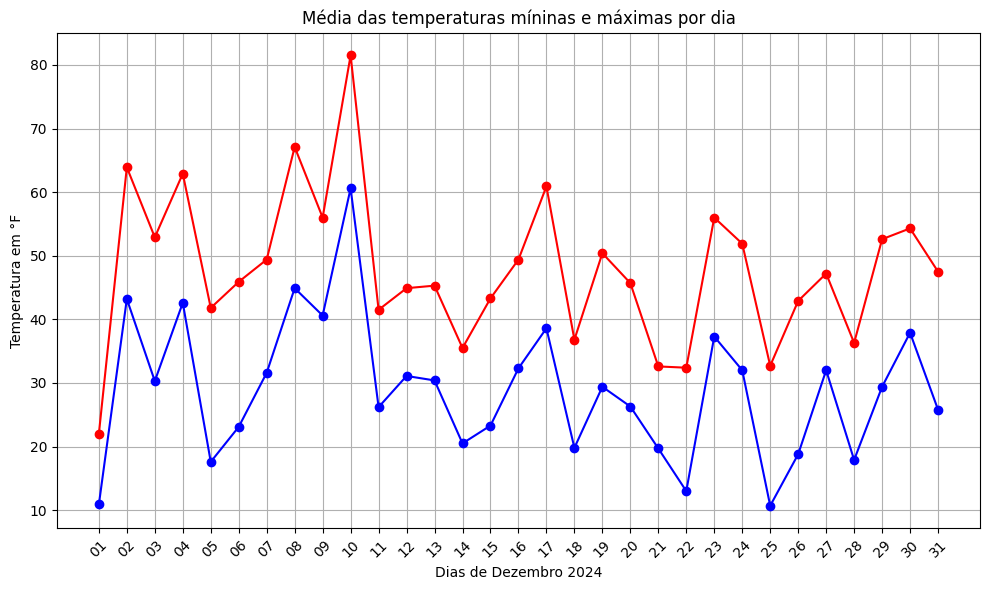

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(dias_dezembro, temp_min, color='blue', label='Temperatura Mínima', marker='o')
plt.plot(dias_dezembro, temp_max,  color='red', label='Temperatura Máxima', marker='o')


plt.title("Média das temperaturas míninas e máximas por dia")
plt.xlabel('Dias de Dezembro 2024')
plt.ylabel('Temperatura em °F')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

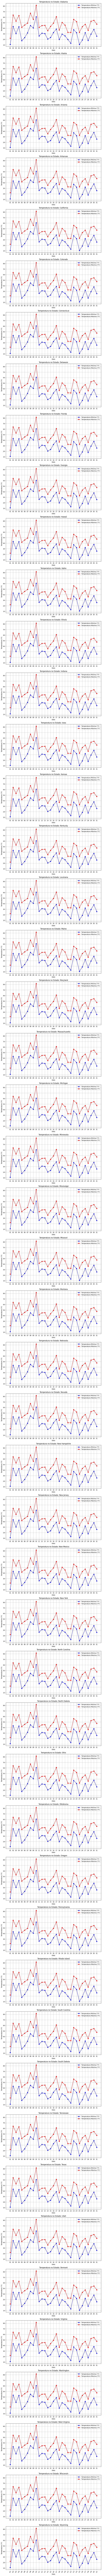

In [16]:
n = len(df)

fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n))

# Plotando os gráficos por estado
for i, ax in enumerate(axes):
    temp_min = [df[f'Average_Temperature_Min_F_2024-12-{i:02d}'].iloc[i] for i in range(1, 32)]
    temp_max = [df[f'Average_Temperature_Max_F_2024-12-{i:02d}'].iloc[i] for i in range(1, 32)]

    ax.plot(dias_dezembro, temp_min, label='Temperatura Mínima (°F)', color='blue', marker='o')
    ax.plot(dias_dezembro, temp_max, label='Temperatura Máxima (°F)', color='red', marker='o')
    ax.set_title(f"Temperatura no Estado: {df['State'].iloc[i]}")
    ax.set_xlabel('Data')
    ax.set_ylabel('Temperatura (°F)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()

plt.show()